# Neural Networks

## Introduction to Neural Networks, Perceptrons and Deep Learning.

### *Neural* *networks* are a type of machine learning algorithm that draw inspiration from the anatomical structure and operations of the human brain.

### A brief history

The McCulloch-Pitts Neuron, technically the first neural network, was just a single neuron, named after its neuroscientist and logician creators in 1943.
Interestingly, their primary goal was not applications like trend prediction, but rather to offer a mathematical explanation and logical representation for the intricate functioning of the brain and its capability to generate and seemingly learn complex patterns.  And so, the McCulloch-Pitts Neuron had to intuitively reflect the structure of its biological analogue.



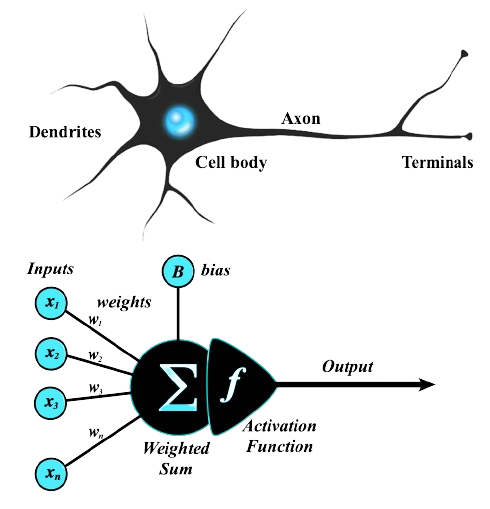

   <center><i style = 'color: red; font-size: 13pt'> Structural comparison between a biological and artificial neuron.</i></center>

McCulloch and Pitts aimed to model the 'all-or-none' nature of a neuron's output, which corresponds to binary classification as known today. The MP neuron represented an early effort to replicate binary decision-making in humans. However, it had a limitation: it could only process binary information. If the sum of these individual binary inputs exceeded a threshold or a condition checked by the function f(x), the output of the MP neuron would be 1. 

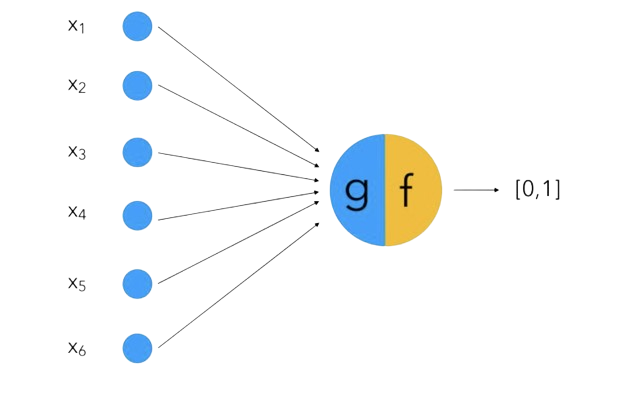

   <center><i style = 'color: red; font-size: 13pt;'> Visualisation of a MP neuron.</i></center>

To address this challenge, Frank Rosenblatt, a psychologist, introduced the concept of a <span style = 'font-size:15pt; color : brown;'>'**Perceptron**'</span> in 1957, building upon the foundation of the MP neuron but expanding its capabilities to handle non-binary inputs. In this model, each **input** was assigned a distinct **weight**, and a weighted sum was calculated. This sum, along with a constant known as a '**bias**,' was then subjected to a threshold function represented by f(x). If the summation exceeded zero, the output would be 1; otherwise, it would be 0.

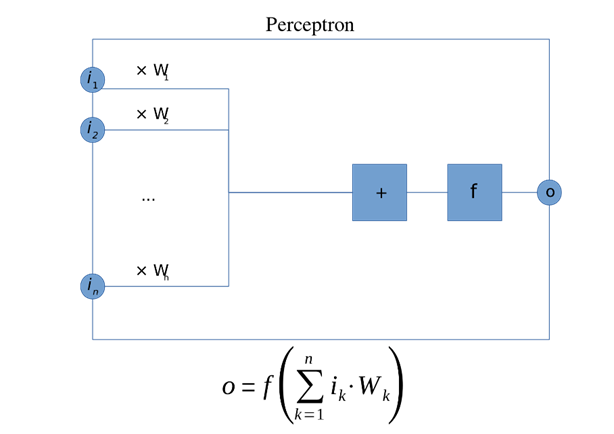

   <center><i style = 'color: red; font-size: 13pt;'> Visualisation of a Rosenblatt Perceptron.</i></center>

Here, $$f\left(x\right)=1\ iff\ x>0$$ 



This function is called the **step function** which is a specific type/example of an **Activation function**, which simply put, takes the linear combination or sum of the inputs and transforms it non linearly dictating how 'excited' that neuron becomes as a result of the input. Two computer scientists, Seymour Papert and Marvin Minsky, in 1969, formalized the strucuture of the Rosenblatt Pereceptron by replacing the **step function** with a generalised **activation function** that could be chosen adhoc.

### And thus the Perceptron as we know it today was born. 

#### It is important to note that, the words 'perceptron' and 'neuron' are often interchangably used to refer to the smallest individual unit of a neural network. But a perceptron sometimes also refers to the single layer neural network model popularized by Minsky and Papert.

Now, that we have consolidated our theoretical understanding of a perceptron/neuron. Let us build our first Neural Network to model logistic regression. This can be accomplished by just a Perceptron, the simplest Neural Network.

The relationship between multiple linear regression and logistic regression lies in the transformation of the weighted sum of input features. While multiple linear regression predicts a continuous outcome, logistic regression seeks to map this linear combination to a bounded [0, 1] output. By employing a logistic or sigmoid function, logistic regression effectively converts the linear prediction into a probability. This transformation makes logistic regression particularly valuable for binary classification tasks, as the output can be interpreted as the likelihood of an observation belonging to a specific category.

Logistic regression is able to map the linear sum to a scalar between 0 to 1 by using the **sigmoid activation function**
Which is mathematically expressed as:


$$ S(ζ) = \frac{1}{1 + e^{- ζ}} $$

where, ζ is the multiple linear regression equation, essentially a weighted sum (coefficient beta multiplied with a predictor)

This function will always return a number between 0 and 1. The result, if greater than 0.5, can be interpreted as a 'True' classification and 'False' otherwise.

#### Let us take a dataset, WeatherAUS.csv, we will then employ logistic regression to predict next-day rainfall in Australia, focusing on the RainTomorrow binary target. Utilizing meteorological features like MinTemp, MaxTemp, Rainfall, and RainToday (4 predictors to predict the RainTomorrow binary variable)


The previous sections have provided a comprehensive understanding of the structure of a neural network, with a specific focus on the perceptron. However, the crucial question of how a neural network learns and makes predictions remains unanswered. The upcoming section will delve into the mechanisms and processes involved in the learning and prediction capabilities of neural networks.


#### Following is the schematic representation of the Perceptron Neural Network for this dataset and the logistic regression task:

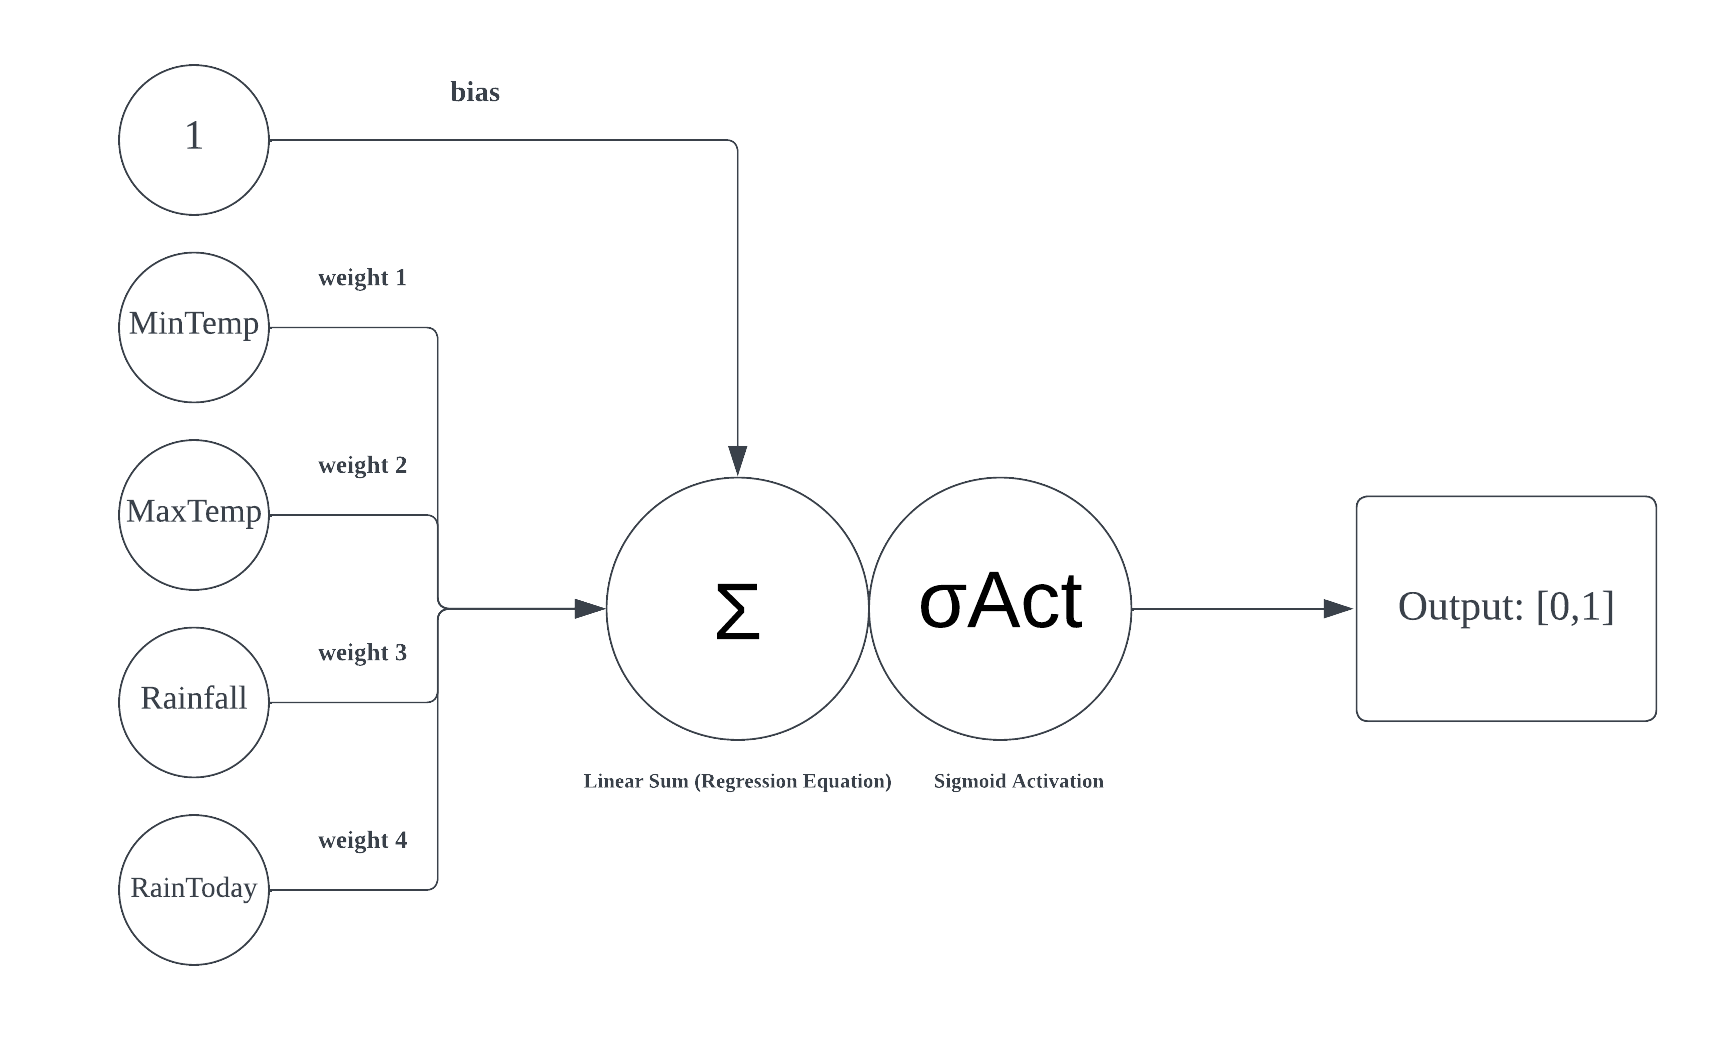

Here, $$ ζ = MinTemp * Weight1 + MaxTemp* Weight2 + Rainfall * Weight3 + RainToday * Weight4 + 1 * Bias $$

is the Linear Regression Equation. Our goal, with any predictive model, especially linear regression, is to learn and find the best values for the coefficients [Weight1, Weight2, Weight3, Weight4]

ζ can also be represented as the dot product of the two matrices:

 $$ X = \begin{bmatrix} MinTemp & MaxTemp & Rainfall & RainToday \end{bmatrix}$$ $$ W^T = \begin{bmatrix} Weight1 \\ Weight2 \\ Weight3 \\ Weight4 \end{bmatrix} $$
$$ b = Bias*1 $$
 Then, $$ζ =  X · W^T + b$$

In neural network language, these coefficients are known as **weights**. The constant term in a linear regression model is known as **bias** and collectively these are known as **paramaters**. Simply put, the aim of a neural network is to arrive and learn the ideal value of these parameters such that loss is minimized and accuracy of the model is maximized.

**An important distinction to be made between Linear Regression and Neural Networks is how they learn. Regression models learn their coefficient values through empirical methods like Ordinary Least Squares, where as Neural Networks learn their parameters through a process called Gradient Descent.** This process will be covered in further detail in the following sections.

For now, backpropogation could just be thought about as a mechanism that over a certain number of iterations, generally speaking, reduces the error of the model by slightly tweaking the parameters towards their correct values every iteration. This continual correction of error is called the **training phase** of a neural network. In the traning phase, the Neural Network learns and fits to the trends of the **training set**. Following training, we usually have 2 more partitions of the original dataset called **validation set** and **test set** each of which will be explained later.

For now, we will now simulate the **training** and **testing** phase of this proposed model/architecture using python in the following code snippets,  below is a Perceptron-LogRegression model from scratch. This will show us exactly the steps a neural network takes to reduce loss over time.

### Importing necessary libraries for faster computations and increased range of math functions.

In [421]:
import pandas as pd
import numpy as np
import math
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Reading the modified version of the WeatherAUS.csv dataset and loading it into memory.
### Then standardising the dataset and splitting it into training and testing set.

In [463]:
data =pd.read_csv("out.csv")
data = data.dropna()
x = data.iloc[:,0:5]
y = data.iloc[:,-1].to_numpy()

x = x.iloc[:,1:]
scaler = StandardScaler(with_std=True)
new_X = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(new_X,y, test_size=0.30)

print(x.shape)

(471, 4)


### Setting the parameters of the model (intializing the weights and bias to be a sample from a normal distribution of mean = 0 and std = 1)

In [423]:

epochs=1000
lr = 0.001

bias = random.normalvariate(0,1)
w1 =random.normalvariate(0,1)
w2=random.normalvariate(0,1)
w3=random.normalvariate(0,1)
w4=random.normalvariate(0,1)
weights = np.array([w1,w2,w3,w4])
weights_vec = weights.reshape(4) ##good practice to force reshape into numpy array

In [424]:

def sigmoid(x):
    '''
    Robust sigmoid function that can handle a large domain of values effectively the same as the one mentioned above.
    '''
    if x >= 0:
        z = math.exp(-x)
        return 1 / (1 + z)
    else:
        z = math.exp(x)
        return z / (1 + z)
    
def BinaryCrossEntropy(y_true, y_pred): 
    '''
    Loss function to quantify how far away from the correct answer the prediction was.
    '''
    y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
    term_0 = (1-y_true) * np.log(1-y_pred + 1e-7)
    term_1 = y_true * np.log(y_pred + 1e-7)
    return -(term_0+term_1)



In [ ]:
def forward_pass(d_vector):
    '''
    This is the forward pass of a neural network, here the linear sum is calculated with the current weights and input vector which then is 
    fed to the activation function (sigmoid, in our case) which then outputs a predicition.

    In the training phase, the final output of the forward pass is then used to calculate the loss and subsequently update the parameters (weights and bias)
    When the model used to predict, the output of the forward pass is just the final predicition.
    '''
    linear_sum = np.matmul(d_vector,weights_vec.T)+bias
    sigmoid_activated =  sigmoid(linear_sum)
    return sigmoid_activated

###  Training the Perceptron using Online Gradient Descent:

1. For each datapoint, loading the **standardized predictors** into a (1,4) shaped vector.
2. Computing the forward pass and getting a predicted probability.
3. Using gradient descent, calculating the gradient of the error w.r.t each of the weights.
4. For each weight and bias, updating the values by a factor of the `lr` *  -1 * gradient (-1 ensures we are moving towards the minimum of the loss function, the value of the parameters for which the error is the lowest.
5. Repeating 1-4 for `epoch` times.


In [425]:
#lists to log the time series of loss
avg_loss_epoch= []
epochs_lin = np.linspace(0,epochs,epochs)


for e in range(epochs):
        avg_loss = 0
        for i in range(len(x_train)):

            #------FORWARD PASS AND LOSS GRADIENT CALCULATION------#
            d_vec = x_train[i] 
            a =forward_pass(d_vector=d_vec)
            y = y_train[i]
            grad = (a-y)*d_vec.T


            
            avg_loss+= BinaryCrossEntropy(y,a) ## This is just to log the loss decreasing as time goes on

            #------UPDATING PARAMETERS ------#
            for i in range(len(weights_vec)):
                updated =grad[i] * -lr
                weights_vec[i] += updated #Weights are updated
            bias += (a-y) * -lr  #Bias is updated

        ## This is just to log the loss decreasing as time goes on
        if e % 100 ==0: 
            print(f'Average BCELoss for epoch {e} is {avg_loss/len(x_train)}')
        avg_loss_epoch.append(avg_loss/len(x_train))


Average BCELoss for epoch 0 is 7.938467318224742
Average BCELoss for epoch 100 is 0.4997743778714289
Average BCELoss for epoch 200 is 0.44562980924880047
Average BCELoss for epoch 300 is 0.43279823763335495
Average BCELoss for epoch 400 is 0.43094234785550467
Average BCELoss for epoch 500 is 0.4307294999655255
Average BCELoss for epoch 600 is 0.4306969294817969
Average BCELoss for epoch 700 is 0.4306897039925342
Average BCELoss for epoch 800 is 0.43068777798590846
Average BCELoss for epoch 900 is 0.43068722612774957


### Let us see how accurate our trained model is by making predictions on the test set and judging how accurate said predictions are.

In [426]:
correct=0
for i in range(len(x_test)):
        pred = forward_pass(x_test[i])
        if(np.round(pred)==y_test[i]):
            correct+=1

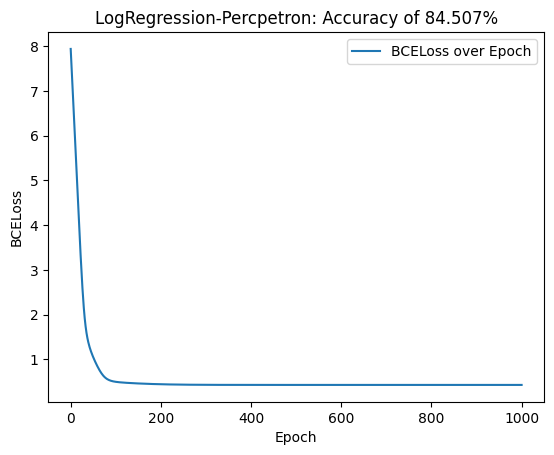

In [427]:
plt.plot(epochs_lin,avg_loss_epoch)
plt.legend({'BCELoss over Epoch'})
plt.ylabel('BCELoss')
plt.xlabel('Epoch')
plt.yscale('linear')
plt.title(f'LogRegression-Percpetron: Accuracy of {np.round((correct/len(x_test)*100),3)}%')
plt.show()

### Final values of the weights and bias we get:

In [436]:
print(f"Weights: {weights_vec.tolist()} \n Bias = {bias}")

Weights: [1.208404784745497, -1.081803244266224, 0.25194505047005955, 0.42800139825844674] 
 Bias = -1.5137349336942643


## It is worth nothing that a perceptron has the ability to only spearate linearly related datasets. If the predictors of a dataset have a non linear association with the target, you will need to feed the output of one neuron to others.

Data seen in real life is typically not as straight forward and requires multiple neurons feeding into each other. This increases the lateral depth of a neural network making it a **deep neural network** and each vertical segment of neurons can be thought about as a layer.

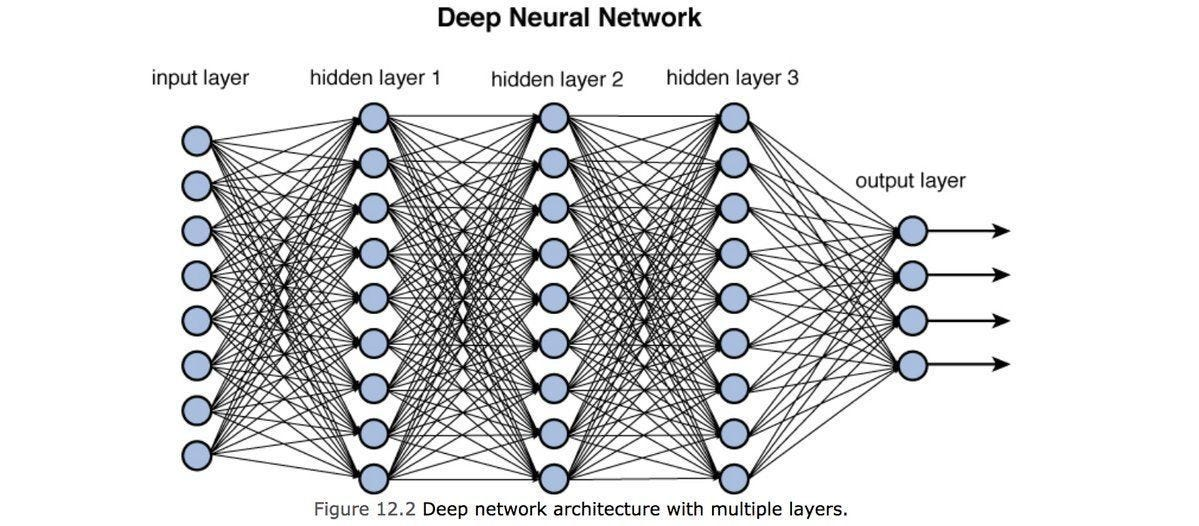

This is an example of a neural network that has 3 hidden layers, each of these neurons you see is one independent perceptron we just trained connected to every other perceptron before and after it.

## Activation Functions
Now we know that adding hidden layers is beneficial. The important questions that must be answered are:

1) Can we add any number of hidden layers?
 No. This can cause a decrease in the accuracy of the model and can also cause overfitting if too. 
many layers are added. So, it is important to add the right number of layers.

If you want to know more about it here are some of the resources, you can use.
1) For a quick overview consider having a look at the following thread on stack exchange
https://stats.stackexchange.com/questions/338255/what-is-effect-of-increasing-number-of-hidden-layers-in-a-feed-forward-nn
2) If you want to dive deeper then you can refer to Chapter 5 of the Deep Learning book 
https://www.deeplearningbook.org/



2) Can we stack two hidden layers back-to-back?
The answer is no and in this section, we will see why.
This is because the linear input signals need to be converted to nonlinear input signals for 
high-order polynomials for deeper networks. Let’s look at what happens if we do not do that.
We know that the output of a hidden layer in an MLP is a matrix and is given by Z = W.T @ x + b
here W - weight, X - input, b - bias
Now let’s assume that we have 2 hidden layers (Z1 and Z2) stacked back-to-back. 
Z1 = W1.T @ x1, Z2 = W2.T @ x2 Here for the sake of simplicity bias was assumed to be zero
After substituting Z1 in Z2 we get Z2 = W2.T @ Z1 (as the output of Z1 is the input of Z2)
=> Z2 = (W2.T @ W1.T) @ x1 
We know that W2.T @ W1.T = (W2 @ W1). T and if we assume W2 @ W1 to be some matrix W3 then the equation 
for Z2 can be collapsed to Z2 = W3.T @ x1. Now if we compare the equation of Z2 that we have to the general equation of the hidden layer they are exactly the same.  
What does that mean conceptually? 
This means that by simply stacking 2 hidden layers back-to-back the resulting output of 2nd hidden layer will be the same as having one layer but with a different weight matrix. In other words, stacking 2 layers back-to-back is the same as having 1 layer and having the second one is redundant. 
So, what can we do to reap the benefits of using more hidden layers? 
We use Activation functions.

Activation functions are functions used in a neural network to compute the weighted sum of inputs and biases, which is in turn used to decide whether a neuron can be activated or not. They are differentiable operators for transforming input signals to outputs, while most of them add nonlinearity [1].
Here’s another website that covers the basics.  
https://www.analyticsvidhya.com/blog/2021/04/activation-functions-and-their-derivatives-a-quick-complete-guide/ 




| Name                          | Plot | Equation | Derivative |
| ----------------------------- | ---- | -------- | ---------- |
| Identity                      | | | |
| Binary Step                   | | | |
| Logistic                      | | | |
| TanH                          | | | |
| ArcTan                        | | | |
| Rectified Linear Unit (ReLU)  | | | |
| Parameteric RELU (PReLU       | | | |
| Exponential Linear Unit (ELU) | | | |
| SoftPlus                      | | | |


Now let’s look at some of the activation functions [2].


### Picking the right activation function
Picking the right activation function is subjective and changes on a case-by-case basis. Optimally when designing a neural network, we would want to try different activation functions and then compare the performance and pick the right one. 
The most used ones are ReLU and sigmoid.

1) ReLU - f(x) = max (0, x)
For all negative values of x, the output will be zero and for all the other values the output will be x.

ReLU is generally preferred over the other activation functions for the following reasons.
Computational Simplicity 
- It only uses a simple max function which is easier to implement as opposed to the other activation functions as it requires less computation and is cheaper to execute as fewer operations are required [4]. 
Representational Sparsity 
- Due to its ability to produce a true zero it can accelerate the learning process and simplify the model [4].
Linear Behaviour
- We can hugely reduce the risk of vanishing gradient [4].

More info about the advantages can be found here. 
https://proceedings.mlr.press/v15/glorot11a


2) Sigmoid - f(x) = 1/ (1+ exp(-x))
The range of the output is (0,1). It is important to remember that the output can only approach the 
values 0,1 but can never be 0 or 1.

Here are some of the advantages of using a sigmoid  
As the values are between 0 and 1 the confidence of the model can easily be estimated [5].
It gives a smooth gradient by removing discontinuities in output values [5]. 

For more information, you can also look at the website https://www.analyticsvidhya.com/blog/2021/04/activation-functions-and-their-derivatives-a-quick-complete-guide/


## Back Propogation
When training a Neural network there are 2 phases 
Forward pass - The process of calculating the variables for an NN from the input layer to the output layer.
Backward pass/backpropagation - The process propagating the error to the output.
layer until reaching the input layer passing through the hidden layers.

In each epoch, a cycle is followed. It is:
Forward Pass
Error calculation
Backward pass 
Epoch – One complete pass of the training dataset through the algorithm.



In an epoch, if the error after the forward pass is high then that means that the network did not learn properly. This is because the set of weights isn’t accurate to reduce error. This motivates us to update the weights to reduce the error and that is where backpropagation comes in handy [6].  

Backpropagation is an algorithm that is used to calculate the loss of the gradient vector concerning the parameters of the neural network.

### How backpropagation works 
****The example below was taken from a MLOps Blog, A Comprehensive Guide to the Backpropagation Algorithm in Neural Networks by Ahmed Gad on Neptune.ai (https://neptune.ai/blog/backpropagation-algorithm-in-neural-networks-guide).****

How the algorithm works is best explained based on a simple network, like the one given in the next figure. It only has an input layer with 2 inputs (X1 and X2) and an output layer with 1 output. There are no hidden layers.
The weights of the inputs are W1 and W2, respectively.  The bias is treated as a new input neuron to the output neuron which has a fixed value +1 and a weight b. Both the weights and biases could be referred to as parameters.
Figure taken from this book: Ahmed Gad, Practical Computer Vision Applications Using Deep Learning with CNNs, 978-1484241660. 2018, Apress 
Let’s assume that the output layer uses the sigmoid activation function defined by the following equation:
$$f(s)=\frac{1}{1+e^{-s}}$$
Where s is the sum of products (SOP) between each input and its corresponding weight:
$s=X_1*W_1+ X_2*W_2+b$
To make things simple, a single training sample is used in this example. The next table shows the single training sample with the input and its corresponding desired (i.e. correct) output for the sample. In practice, more training examples are used.

| X1  | X2  | Desired Output |
| --- | --- | -------------- |
| 0.1 | 0.3 | 0.03           |

Assume that the initial values for both weights and bias are like in the next table.
| W1  | W2  | b    |
| --- | --- | ---- |
| 0.5 | 0.2 | 1.83 |

For simplicity, the values for all inputs, weights, and biases will be added to the network diagram.
Figure taken from this book: Ahmed Gad, Practical Computer Vision Applications Using Deep Learning with CNNs, 978-1484241660. 2018, Apress 

Now, let’s train the network and see how the network will predict the output of the sample based on the current parameters. 
As we discussed previously, the training process has 2 phases, forward and backward. 

#### Forward pass
The input of the activation function will be the SOP between each input and its weight. The SOP is then added to the bias to return the output of the neuron:
$s=X_1* W_1+ X_2*W_2+b$
$s=0.1* 0.5+ 0.3*0.2+1.83$
$s=1.94$

The value 1.94 is then applied to the activation function (sigmoid), which results in the value 0.874352143.

$$f(s)=\frac{1}{1+e^{-s}}=\frac{1}{1+e^{-1.94}}=0.874352143$$

The output of the activation function from the output neuron reflects the predicted output of the sample. It’s obvious that there’s a difference between the desired and expected output. But why? How do we make the predicted output closer to the desired output? We’ll answer these questions later. For now, let’s see the error of our network based on an error function. 

The error functions tell how close the predicted output(s) are to the desired output(s). The optimal value for error is zero, meaning there’s no error at all, and both desired and predicted results are identical. One of the error functions is the squared error function, as defined in the next equation:

Note that the value 12 multiplied by the equation is for simplifying the calculation of the derivative using the backpropagation algorithm. 

Based on the error function, we can measure the error of our network as follows:

$$E=\frac{1}{2}(desired-predicted)^2$$
$$E=\frac{1}{2}(0.003-0.874352143)^2$$
$$E=0.35645271$$

The result shows that there is an error, and a large one: (~0.357). The error just gives us an indication of how far the predicted results are from the desired results. 

Knowing that there’s an error, what should we do? We should minimize it. To minimize network error, we must change something in the network. Remember that the only parameters we can change are the weights and biases. We can try different weights and biases, and then test our network.

We calculate the error, then the forward pass ends, and we should start the backward pass to calculate the derivatives and update the parameters.

To practically feel the importance of the backpropagation algorithm, let’s try to update the parameters directly without using this algorithm.

#### Parameters update equation
The parameters can be changed according to the next equation:
$$W_{n+1}=W(n)+η[d(n)-Y(n)]X(n)$$

Where:
- n: Training step (0, 1, 2, …).
- W(n): Parameters in the current training step. Wn=[bn,W1(n),W2(n),W3(n),…, Wm(n)]
- η: Learning rate with a value between 0.0 and 1.0.
- d(n): Desired output.
- Y(n): Predicted output.
- X(n): Current input at which the network made a false prediction.

For our network, these parameters have the following values:
- n: $0$
- W(n): $[1.83, 0.5, 0.2]$
- η: Because it is a hyperparameter, then we can choose 0.01 for example.
- d(n): $[0.03]$
- Y(n): $[0.874352143]$
- X(n): $[+1, 0.1, 0.3]$ The first value (+1) is for the bias.

We can update our network parameters as follows:
$W(n+1)=W(n)+η[d(n)-Y(n)]X(n)$
$=[1.83, 0.5, 0.2]+0.01[0.03-0.874352143][+1, 0.1, 0.3]$
$=[1.83, 0.5, 0.2]+0.01[-0.844352143][+1, 0.1, 0.3]$
$=[1.83, 0.5, 0.2]+-0.00844352143[+1, 0.1, 0.3]$
$=[1.83, 0.5, 0.2]+[-0.008443521, -0.000844352, -0.002533056]$
$=[1.821556479, 0.499155648, 0.197466943]$

The new parameters are listed in the next table:

| W1new       | W2new       | bnew        |
| ----------- | ----------- | ----------- |
| 0.197466943 | 0.499155648 | 1.821556479 |

Based on the new parameters, we will recalculate the predicted output. The new predicted output is used to calculate the new network error. The network parameters are updated according to the calculated error. The process continues to update the parameters and recalculate the predicted output until it reaches an acceptable value for the error.

Here, we successfully updated the parameters without using the backpropagation algorithm. Do we still need that algorithm? Yes. You’ll see why.

The parameters-update equation just depends on the learning rate to update the parameters. It changes all the parameters in a direction opposite to the error. 

But, using the backpropagation algorithm, we can know how each single weight correlates with the error. This tells us the effect of each weight on the prediction error. That is, which parameters do we increase, and which ones do we decrease to get the smallest prediction error?

For example, the backpropagation algorithm could tell us useful information, like that increasing the current value of W1 by 1.0 increases the network error by 0.07. This shows us that a smaller value for W1 is better to minimize the error.

#### Partial derivative
One important operation used in the backward pass is to calculate derivatives. Before getting into the calculations of derivatives in the backward pass, we can start with a simple example to make things easier.

For a multivariate function such as Y=X2Z+H, what’s the effect on the output Y given a change in variable X? We can answer this using partial derivatives, as follows:

$$\frac{\partial Y}{\partial X}=\frac{\partial}{\partial X}(X^2Z+H)\frac{\partial Y}{\partial X}=2XZ$$

Note that everything except X is regarded as a constant. Therefore, H is replaced by 0 after calculating a partial derivative. Here, ∂X means a tiny change of variable X. Similarly, ∂Y means a tiny change of Y. The change of Y is the result of changing X. By making a very small change in X, what’s the effect on Y? 

The small change can be an increase or decrease by a tiny value. By substituting the different values of X, we can find how Y changes concerning X.

The same procedure can be followed to learn how the NN prediction error changes W.R.T. changes in network weights. So, our target is to calculate ∂E/W1 and ∂E/W2 as we have just two weights W1 and W2. Let’s calculate them.

#### Derivatives of the Prediction Error W.R.T Parameters
Looking at this equation, Y=X2Z+H, it seems straightforward to calculate the partial derivative ∂Y/∂X because there’s an equation relating both Y and X. In our case, there’s no direct equation in which both the prediction error and the weights exist. So, we will use the multivariate chain rule to find the partial derivative of Y W.R.T X.

#### Prediction Error to Parameters Chain
Let’s find the chain relating the prediction error to the weights. The prediction error is calculated based on this equation:

$$E=\frac{1}{2}(desired-predicted)^2$$

This equation doesn`t have any parameters. No problem, we can inspect how each term (desired & predicted) of the previous equation is calculated, and substitute with its equation until reaching the parameters. 
The desired term in the previous equation is a constant, so there’s no chance of reaching parameters through it. The predicted term is calculated based on the sigmoid function, like in the next equation:

$$f(s)=\frac{1}{1+e^{-s}}$$

Again, the equation for calculating the predicted output doesn’t have any parameters. But there’s still variable s (SOP) that already depends on parameters for its calculation, according to this equation:

$$s=X1* W1+ X2*W2+b$$

Once we’ve reached an equation that has the parameters (weights and biases), we’ve reached the end of the derivative chain. The next figure presents the chain of derivatives to follow to calculate the derivative of the error W.R.T the parameters. 

Note that the derivative of s W.R.T the bias b (∂s/W1) is 0, so it can be omitted. The bias can simply be updated using the learning rate, as we did previously. This leaves us to calculate the derivatives of the 2 weights.

Figure taken from this book: Ahmed Gad, Practical Computer Vision Applications Using Deep Learning with CNNs, 978-1484241660. 2018, Apress 
According to the previous figure, to know how prediction error changes W.R.T changes in the parameters we should find the following 
intermediate derivatives:

Network error W.R.T the predicted output. 

Predicted output W.R.T the SOP. 

SOP W.R.T each of the 3 parameters. 

In total, there are four intermediate partial derivatives:

∂E/∂Predicted, ∂Predicted/∂s, ∂s/W1 and ∂s/W2

To calculate the derivative of the error W.R.T the weights, simply multiply all the derivatives in the chain from the error to each weight, as in the next 2 equations:

∂E/W1=∂E/∂Predicted* ∂Predicted/∂s* ∂s/W1

∂EW2=∂E/∂Predicted* ∂Predicted/∂s* ∂s/W2

Important note: We used the derivative chain solution because there was no direct equation relating the error and the parameters together. But, we can create an equation relating them and applying partial derivatives directly to it:
E=1/2(desired-1/(1+e-(X1* W1+ X2*W2+b))2

Because this equation seems complex to calculate the derivative of the error W.R.T the parameters directly, it’s preferred to use the multivariate chain rule for simplicity.

#### Calculating partial derivatives values by substitution

Let’s calculate the partial derivatives of each part of the chain we created.

For the derivative of the error W.R.T the predicted output:


∂E/∂Predicted=∂/∂Predicted(1/2(desired-predicted)2)

=2*1/2(desired-predicted)2-1*(0-1)

=(desired-predicted)*(-1)

=predicted-desired

By substituting by the values:

∂E/∂Predicted=predicted-desired=0.874352143-0.03

∂E/∂Predicted=0.844352143

For the derivative of the predicted output W.R.T the SOP:

∂Predicted/∂s=∂/∂s(1/(1+e-s))

Remember: the quotient rule can be used to find the derivative of the sigmoid function as follows:

∂Predicted/∂s=1/(1+e-s)(1-1/(1+e-s))

By substituting by the values:

∂Predicted/∂s=1/(1+e-s)(1-1/(1+e-s))=1/(1+e-1.94)(1-1/(1+e-1.94))

=1/(1+0.143703949)(1-1/(1+0.143703949))

=1/1.143703949(1-1/1.143703949)

=0.874352143(1-0.874352143)

=0.874352143(0.125647857)

∂Predicted/∂s=0.109860473

For the derivative of SOP W.R.T W1:

∂s/W1=∂/∂W1(X1* W1+ X2*W2+b)

=1*X1*(W1)(1-1)+ 0+0

=X1*(W1)(0)

=X1(1)

∂s/W1=X1

By substituting by the values:

∂s/W1=X1=0.1

For the derivative of SOP W.R.T W2:

∂s/W2=∂/∂W2(X1* W1+ X2*W2+b)

=0+1*X2*(W2)(1-1)+0

=X2*(W2)(0)

=X2(1)

∂s/W2=X2

By substituting by the values:

∂s/W2=X2=0.3

After calculating the individual derivatives in all chains, we can multiply all of them to calculate the desired derivatives (i.e. the derivative of the error W.R.T each weight). For the derivative of the error W.R.T W1:

∂E/W1=0.844352143*0.109860473*0.1

∂E/W1=0.009276093

For the derivative of the error W.R.T W2:

∂E/W2=0.844352143*0.109860473*0.3

∂E/W2=0.027828278

Finally, there are two values reflecting how the prediction error changes with respect to the weights:

0.009276093 for W1

0.027828278 for W2

What do these values mean? These results need interpretation.






Understanding the results of backpropagation
Derivative sign 
- When it is > 0 then the change in weight is directly proportional to the error.
- When it is < 0 then the change in weight is inversely proportional to the error.
Note for both cases change in weight P causes a difference in Derivative Magnitude*P


References  

[1] Quinn, J. et al. (2020b) Dive into deep learning: tools for engagement. Thousand Oaks, California: Corwin, a SAGE Company, p. Chapter 5, Section 5.1.  
[2] SHARMA, S. (2017) Activation Functions in Neural Networks, Medium. Towards Data Science. Available at: https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6.  
[3] Unit 6.4 - Choosing Activation Functions (no date) Lightning AI. Available at: https://lightning.ai/courses/deep-learning-fundamentals/unit-6-overview-essential-deep-learning-tips-tricks/unit-6.4-choosing-activation-functions/ (Accessed: 11 March 2024).  
[4]  Brownlee, J. (2019) A Gentle Introduction to the Rectified Linear Unit (ReLU) for Deep Learning Neural Networks, Machine Learning Mastery. Available at: https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/.  
[5] https://www.analyticsvidhya.com/blog/2021/04/activation-functions-and-their-derivatives-a-quick-complete-guide/

# Introduction to CNNs
Before we move on to our final section, a quick congratulations to all of you for making it through our very first notebook. To wrap up this notebook, we want you to take a couple of steps back to recollect all of the previous concepts that we have learned so far and try to relate them back to Monash AIM’s mission statement, which as a reminder is: 
To create imaging solutions to help with the diagnosis and treatment of medical conditions, through interdisciplinary cooperation. 
Before we can begin training a neural network model to perform a specific task, we need to understand that by understanding the nature of the data that we are being presented, there will be specific neural network techniques/models that are more advantageous to adapt in comparison to others. In our case, the data that we will be feeding into our neural networks are medical images which are represented in our daily lives as 2D arrays (image height  image width) where each element has an associated pixel value. With our current toolbox, we should be able to perform image classification to detect whether a patient displays specific medical conditions using our Perceptron model. However, a major drawback to our Perceptron model is the fact that our image is flattened into a flat, 1D vector at the very start of our model. As a result, we will most likely lose all notion of spatial information contained in the original image as the image continues to be passed through the hidden layers, leading to less accurate training and results. 
Instead of flattening our 2D image into a vector of pixel values, we want to preserve and handle our 2D image in its current form i.e., as an array of pixel values. This can be achieved by a form of neural network called a Convolutional Neural Network (CNN), which will be the focus of our discussion in the next Jupyter notebook. Right now, we just want you to understand why there is a need to introduce CNNs instead of using the Perceptron model in correlation with Monash AIM’s mission statement. 
The major difference between this model and our previous Perceptron model is in the first word of its name: “Convolutional”. Convolution in the context of CNNs is a mathematical operation where we overlap a parent matrix with another matrix (called the filter/kernel), multiply the overlapping elements from each matrix, and perform a sum of all the elements. In a way, we are taking a smaller “rectangular box” and sliding it over our 2D image as shown in the figure below where the smaller “rectangular box” is a 3x3 filter (dark blue), the 2D image is a 7x7 matrix (blue) and the corresponding convolved output being the darkened section of the green matrix projected above. 

Figure 1. Convolution of a 3x3 filter and 7x7 matrix. 

Instead of associating each pixel with a neuron in the Perceptron model, we are associating each convolution operation with a neuron. This in turn preserves the spatial information between neighbouring pixels in addition to reducing the computational needs of the CNN model as a smaller number of weights need to be assigned. As we progress through the different hidden layers of the CNN model, we begin to learn a hierarchy of features as shown in the figure below. 

Figure 2. The increasing complexity of features learned by a CNN at each convolutional layer. 

Finally, as the nature of CNNs involve learning “patches” of the image as opposed to our Perceptron model where we are performing pixel-level analysis, the latter is much more vulnerable to variations in images such as occlusion, background clutter, illumination conditions, scale variation, etc. An ideal CNN model is viewed as a model that is not only invariant to all these variations, but also sensitive to detect these features accurately. In fact, the data that we are presented (collection of images) is generally transformed before being passed through the first layer of the CNN model in order to account for variations in data. 
To summarise, the Perceptron model serves as a strong foundation for understanding CNNs which we have discussed to be more effective in handling Monash AIM’s goal of medical image analysis. CNNs and their convolutional operations provide a neural network model that: 
Learns features of an image in a hierarchical manner whilst preserving the spatial information in the image  
Reduces the computational demands during training 
Sensitively detects features in an accurate manner whilst remaining invariant to variations in the data being presented 
